# **CSCI 485 Assignment #4: Perceptron**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Part 1: Heuristic**
---

The data in `data.csv` contains three columns: x, y, and class. The x and y columns represent the coordinates of each data point, while the class column indicates which group the point belongs to.
There are two groups: 0 and 1. In the code below, a `label` column was added which assined the class (0 and 1) to (-1 and 1) to be used in the misclassifcation calculation later.

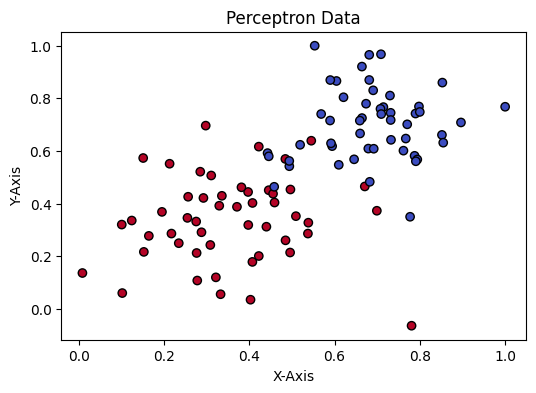

In [10]:
# Load data
df = pd.read_csv("data.csv", sep=",", header=None, names=['x', 'y', 'class'])
df['label'] = df['class'].apply(lambda x: 1 if x == 1 else -1)
plt.figure(figsize=(6, 4))
plt.scatter(df['x'], df['y'], c=df['class'], cmap='coolwarm', edgecolors='k')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Perceptron Data')
plt.show()


The following code applies the heuristic approach with binary classification, using 65 iterations and a learning rate of `[1.0, 0.1, 0.01]`.

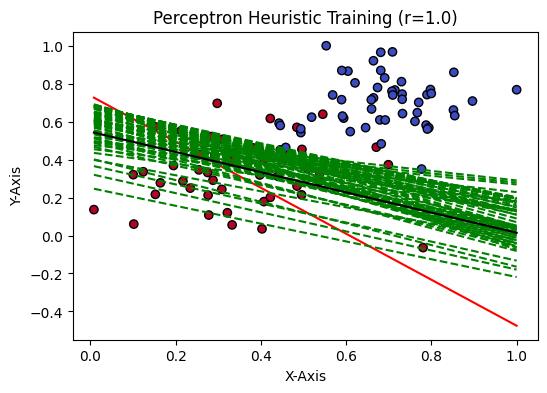

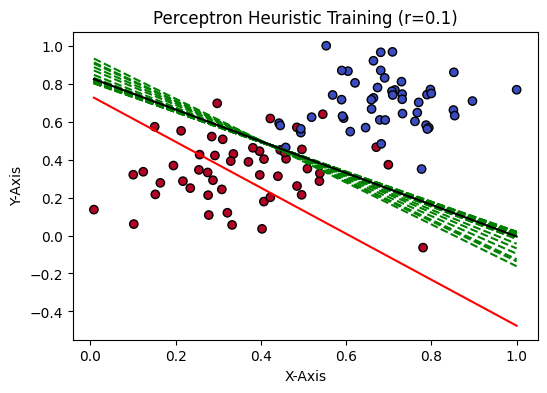

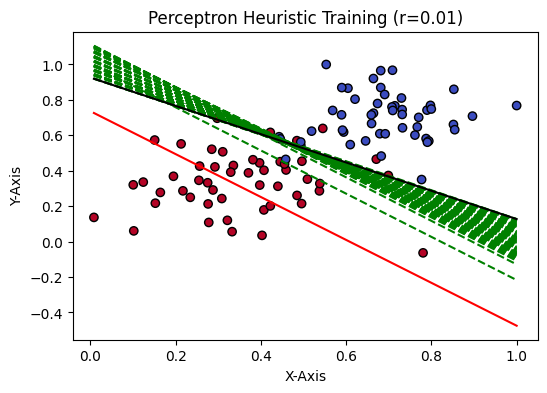

In [9]:
# Initialize weights and bias

R = [1.0, 0.1, 0.01]                   
    
for r in R:
    np.random.seed(1111)
    w = np.random.randn(2)  
    b = np.random.randn()  
    iterations = 65    
    plt.figure(figsize=(6, 4))
    plt.scatter(df['x'], df['y'], c=df['class'], cmap='coolwarm', edgecolors='k')
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.title(f'Perceptron Heuristic Training (r={r})')

    # Plots each type of seperation line on Pereptrion Data Plot
    def plot_seperation_lines(w, b, color, linestyle='-'):
        x_vals = np.linspace(df['x'].min(), df['x'].max(), 100)
        y_vals = -(w[0] * x_vals + b) / w[1]
        plt.plot(x_vals, y_vals, color=color, linestyle=linestyle)


    # Initial seperation line 
    plot_seperation_lines(w, b, 'red')      

    # Heuristic Training Process
    for it in range(iterations):
        for i, row in df.iterrows():
            x = np.array([row['x'], row['y']])
            y = row['label']
            prediction = np.sign(np.dot(w, x) + b)

            if prediction != y:
                if y == 1:
                    w += r * x
                    b += r
                else:
                    w -= r * x
                    b -= r
        plot_seperation_lines(w, b, 'green', linestyle='--')
        
    # final seperation line
    plot_seperation_lines(w, b, 'black')

    plt.show()


The following results showed that a lower learning rate results in a better placement of the boundary line. This makes sense because the lower the learning rate, the more subtle updates are made to the weights, allowing the model to search more thoroughly for the optimal line. On the other hand, a larger learning rate can result in overshooting the optimal line, causing the model to miss the best placement. This observation was made by visually examining the graph.

## **Part 2: Gradient Descent**
---

The same data will be used again, but this time it will use a Gradient Descent approach.

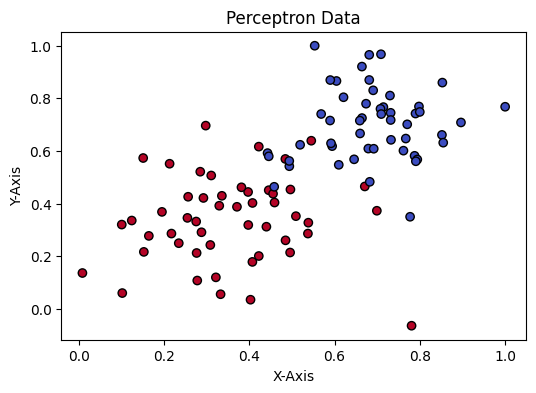

In [8]:
# Load data
df2 = pd.read_csv("data.csv", sep=",", header=None, names=['x', 'y', 'class'])
plt.figure(figsize=(6, 4))
plt.scatter(df2['x'], df2['y'], c=df2['class'], cmap='coolwarm', edgecolors='k')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Perceptron Data')
plt.show()

The following code implements a Gradient Descent approach to determine the best boundary line. It is similar to the heuristic update but adjusts weights based on a loss function. This is different from the heuristic approach, which simply adjusts weights when a misclassification occurs.

Final Loss Value: 0.25547928376744583


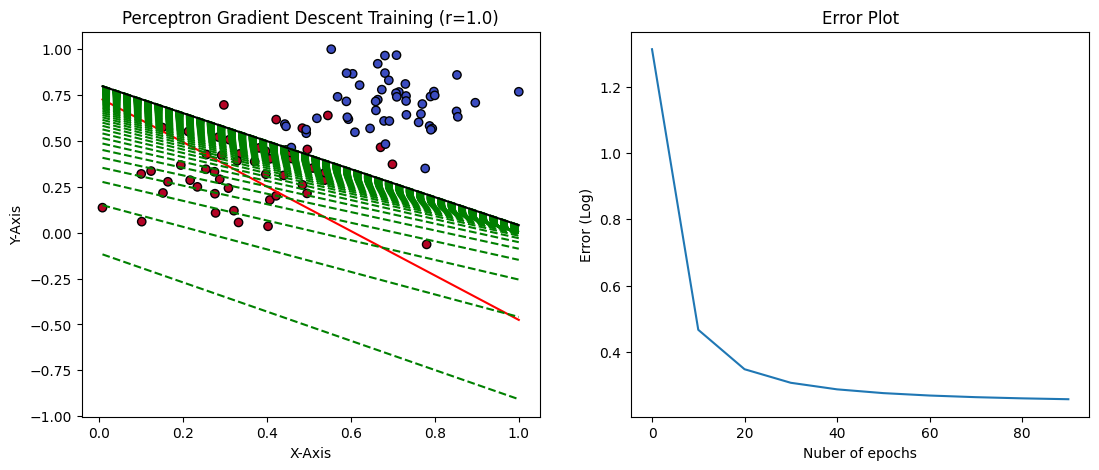

Final Loss Value: 0.1609024481982372


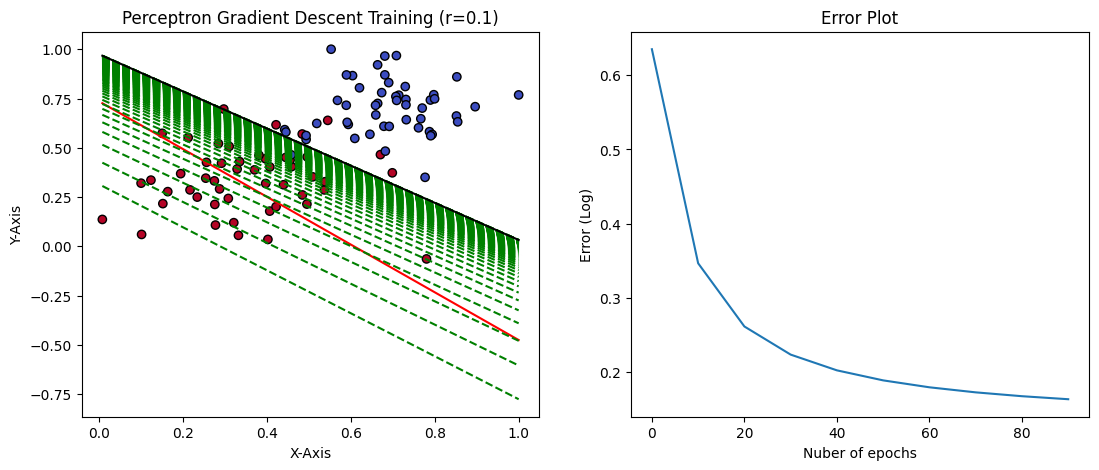

Final Loss Value: 0.29729930372113555


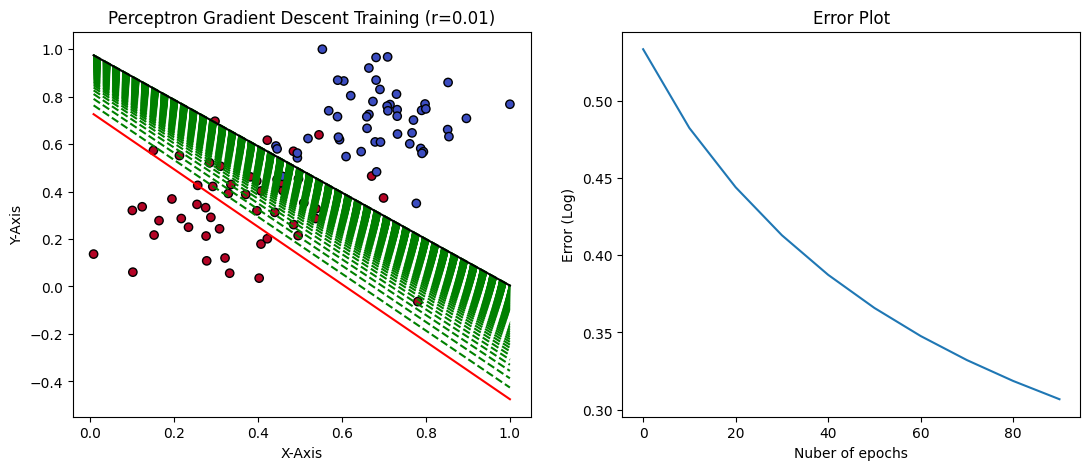

In [11]:

R = [1.0, 0.1, 0.01]

for r in R:
    X = df2[['x', 'y']].values
    y = df2['class'].values 

    np.random.seed(1111)
    w = np.random.randn(X.shape[1])
    b = np.random.randn()
    epochs = 100
    losses = []

    fig, axes = plt.subplots(1, 2, figsize=(13, 5))

    # Sigmoid function
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    # Log loss function
    def log_loss(y_true, y_pred):
        # Avoid log(0) with clipping
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    axes[0].scatter(df2['x'], df2['y'], c=df2['class'], cmap='coolwarm', edgecolors='k')
    axes[0].set_xlabel('X-Axis')
    axes[0].set_ylabel('Y-Axis')
    axes[0].set_title(f'Perceptron Gradient Descent Training (r={r})')

    # Plots each type of seperation line on Pereptrion Data Plot
    def plot_seperation_lines(w, b, color, linestyle='-'):
        x_vals = np.linspace(df2['x'].min(), df2['x'].max(), 100)
        y_vals = -(w[0] * x_vals + b) / w[1]
        axes[0].plot(x_vals, y_vals, color=color, linestyle=linestyle)

    plot_seperation_lines(w, b, 'red')      

    # Gradient Decent Training Process
    for epoch in range(epochs):
        for i in range(len(X)):
            x_i = X[i]
            y_i = y[i]
            
            z = np.dot(w, x_i) + b
            y_hat = sigmoid(z)
            error = y_i - y_hat

            # Gradient descent updates
            w += r * error * x_i
            b += r * error
        plot_seperation_lines(w, b, 'green', linestyle='--')

        # Compute log loss every 10 epochs
        if epoch % 10 == 0:
            y_preds = sigmoid(np.dot(X, w) + b)
            loss = log_loss(y, y_preds)
            losses.append(loss)
        if epoch == epochs-1:  
            y_preds = sigmoid(np.dot(X, w) + b)
            loss = log_loss(y, y_preds)
            print(f"Final Loss Value: {loss}")
    plot_seperation_lines(w, b, 'black')      

    # Plot log loss
    axes[1].plot(range(0, epochs, 10), losses)
    axes[1].set_title("Error Plot")
    axes[1].set_xlabel("Nuber of epochs")
    axes[1].set_ylabel("Error (Log)")
    plt.show()


Given that we have a metric to calculate the accuracy of the line placement, the results showed that a learning rate of 0.1 was better than 1.0 or 0.01. This shows that using a very small learning rate isn't always the best choice. Also, the algorithm only updates the line on one side of the final line, compared to the heuristic algorithm, which updates the line on both sides of the final line. This shows that gradient descent gradually shifts itself toward the optimal line instead of constantly shifting back and forth, overshooting and undershooting the optimal line. The convergence also took longer when the learning rate was high. This makes sense, as it takes longer for the algorithm to find the optimal line when it makes more subtle updates.

Final Loss Value: 0.24564581797221996


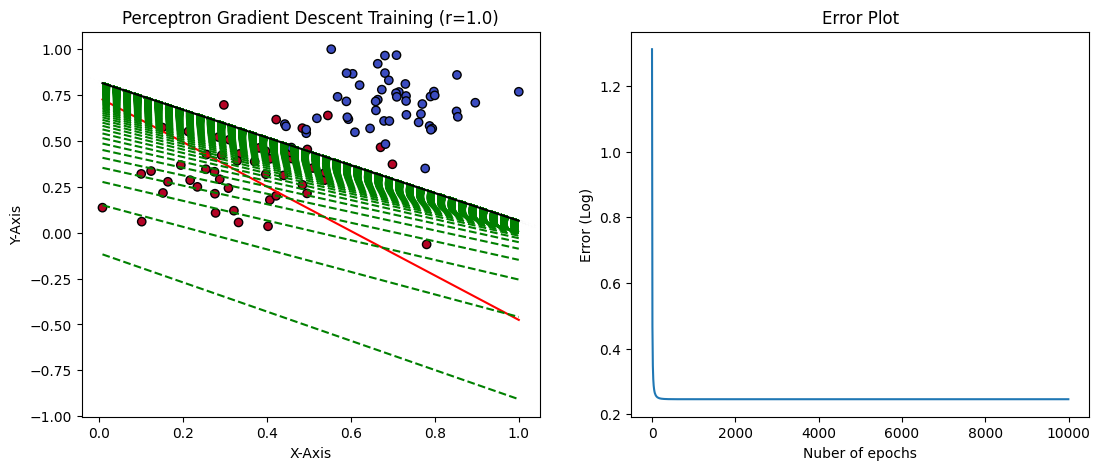

Final Loss Value: 0.13755125221472914


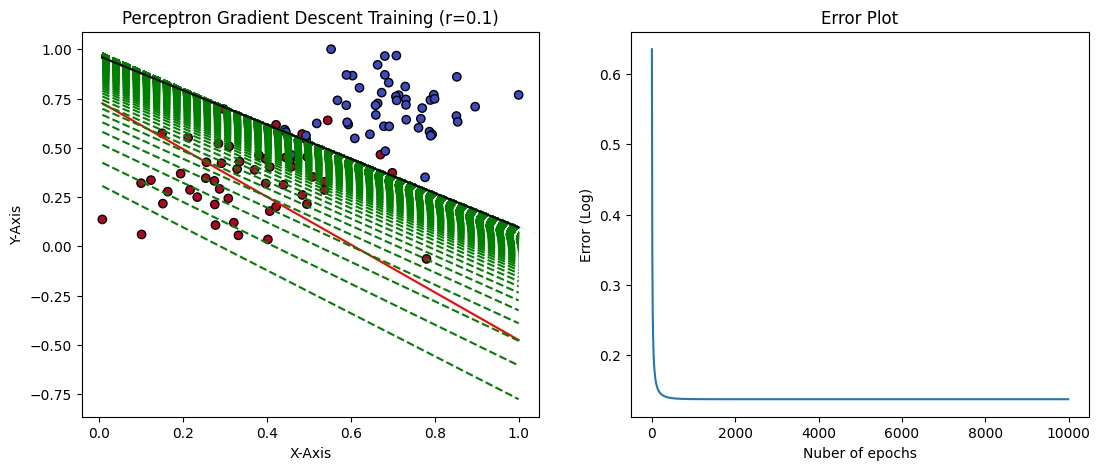

Final Loss Value: 0.1356719295133967


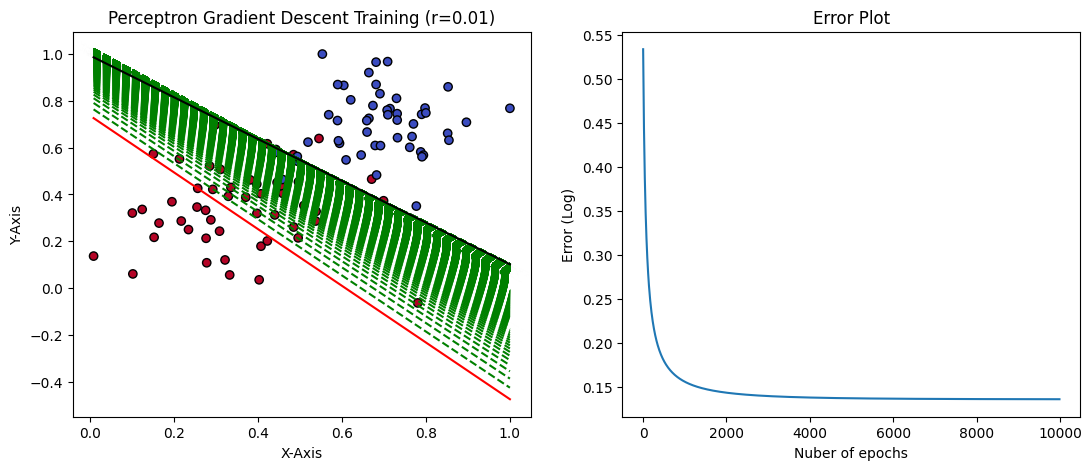

In [12]:

R = [1.0, 0.1, 0.01]

for r in R:
    X = df2[['x', 'y']].values
    y = df2['class'].values 

    np.random.seed(1111)
    w = np.random.randn(X.shape[1])
    b = np.random.randn()
    epochs = 10000
    losses = []

    fig, axes = plt.subplots(1, 2, figsize=(13, 5))

    # Sigmoid function
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    # Log loss function
    def log_loss(y_true, y_pred):
        # Avoid log(0) with clipping
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    axes[0].scatter(df2['x'], df2['y'], c=df2['class'], cmap='coolwarm', edgecolors='k')
    axes[0].set_xlabel('X-Axis')
    axes[0].set_ylabel('Y-Axis')
    axes[0].set_title(f'Perceptron Gradient Descent Training (r={r})')

    # Plots each type of seperation line on Pereptrion Data Plot
    def plot_seperation_lines(w, b, color, linestyle='-'):
        x_vals = np.linspace(df2['x'].min(), df2['x'].max(), 100)
        y_vals = -(w[0] * x_vals + b) / w[1]
        axes[0].plot(x_vals, y_vals, color=color, linestyle=linestyle)

    plot_seperation_lines(w, b, 'red')      

    # Gradient Decent Training Process
    for epoch in range(epochs):
        for i in range(len(X)):
            x_i = X[i]
            y_i = y[i]
            
            z = np.dot(w, x_i) + b
            y_hat = sigmoid(z)
            error = y_i - y_hat

            # Gradient descent updates
            w += r * error * x_i
            b += r * error
        plot_seperation_lines(w, b, 'green', linestyle='--')

        # Compute log loss every 10 epochs
        if epoch % 10 == 0:
            y_preds = sigmoid(np.dot(X, w) + b)
            loss = log_loss(y, y_preds)
            losses.append(loss)
        if epoch == epochs-1:  
            y_preds = sigmoid(np.dot(X, w) + b)
            loss = log_loss(y, y_preds)
            print(f"Final Loss Value: {loss}")

    plot_seperation_lines(w, b, 'black')      

    # Plot log loss
    axes[1].plot(range(0, epochs, 10), losses)
    axes[1].set_title("Error Plot")
    axes[1].set_xlabel("Nuber of epochs")
    axes[1].set_ylabel("Error (Log)")
    plt.show()


When making the epoch a very high number, 10,000 instead of 1,000, the learning rate of 0.01 was the best, slightly beating 0.1. I believe the reason why is because it takes more iterations for a learning rate of 0.01 to find the optimal line, as it makes more adjustments to the line than a learning rate of 0.1.